<a href="https://colab.research.google.com/github/jsansao/estrobo/blob/main/f0_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa

# Generate test samples

## Sine 440 Hz

In [ ]:
# prompt: generate a wave file containing 2s of a sine wave

import numpy as np
import wave
import struct

# Parameters
frequency = 440  # Frequency of the sine wave (Hz)
duration = 2  # Duration of the sound (seconds)
sample_rate = 44100  # Sample rate (samples per second)
amplitude = 16384  # Amplitude (adjust for volume)

# Generate the sine wave
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Convert to 16-bit PCM
sine_wave_16bit = [int(x) for x in sine_wave]
sine_wave_bytes = struct.pack('<' + ('h' * len(sine_wave_16bit)), *sine_wave_16bit)

# Create the WAV file
with wave.open('sin440.wav', 'wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(2)
    wf.setframerate(sample_rate)
    wf.writeframes(sine_wave_bytes)

## Sweep

In [ ]:
# prompt: Generate a wave file containing a sweep tone varying from 80 Hz to 1000 Hz

import numpy as np
import wave
import struct
import librosa

# Parameters
duration = 2  # Duration of the sound (seconds)
sample_rate = 44100  # Sample rate (samples per second)
amplitude = 16384  # Amplitude (adjust for volume)

# Generate time vector
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate sweep frequencies
start_freq = 80  # Starting frequency
end_freq = 1000   # Ending frequency

# Linear sweep
sweep_freq = np.linspace(start_freq, end_freq, len(t))

# Generate the sine wave with varying frequency
sine_wave = amplitude * np.sin(2 * np.pi * np.cumsum(sweep_freq) / sample_rate)

# Convert to 16-bit PCM
sine_wave_16bit = [int(x) for x in sine_wave]
sine_wave_bytes = struct.pack('<' + ('h' * len(sine_wave_16bit)), *sine_wave_16bit)

# Create the WAV file
with wave.open('sweep_tone.wav', 'wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(2)
    wf.setframerate(sample_rate)
    wf.writeframes(sine_wave_bytes)

# Librosa PYIN off-line


In [ ]:
import librosa
import numpy as np

# Carregar arquivo de áudio
y, sr = librosa.load('sweep_tone.wav')

# Configurar parâmetros
fmin = librosa.note_to_hz('C2')  # ~65 Hz
fmax = librosa.note_to_hz('C7')  # ~2093 Hz

# Detectar F0
f0, voiced_flag, voiced_probs = librosa.pyin(y,
    fmin=fmin,
    fmax=fmax,
    sr=sr)


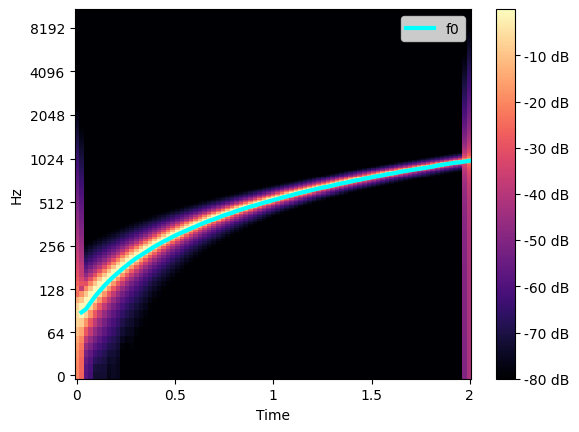

In [ ]:
import matplotlib.pyplot as plt

# Criar espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
times = librosa.times_like(f0, sr=sr)

# Plotar
plt.figure()
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.plot(times, f0, label='f0', color='cyan', linewidth=3)
plt.colorbar(format="%+2.f dB")
plt.legend()
plt.show()
